# Data behind the mRS probability distributions

## Aims:

All of the various mRS probability data sets are gathered here. We define probability distributions at times from onset to treatment of zero hours and of the no-effect time, $t_{ne}$. Any data sets containing mRS=6 (death) have the associated probability $P(\mathrm{mRS}=6)$ removed, and the remaining values are normalised so that $P(\mathrm{mRS}\leq5)=1.0$.

All of the probability distributions are plotted here as stacked horizontal bars and as histograms (bar charts).

Most of the data is taken directly from the source, but some of the probability distributions here have been calculated from multiple data sets. These more complicated distributions are derived later on in this notebook. 

## Descriptions of the mRS data sets used here:

| Description | $t=0$ | $t=t_{ne}$ (no treatment) | 
| :-- | :-- | :-- |
| Pre-stroke | The estimated pre-stroke mRS scores from SSNAP data, as used in the SAMueL-1 project. | N/A |
| Haemorrhaegic | N/A | _(yet to find)_ |
| nLVO & LVO combined | [Explained here](#nLVO-and-LVO-combined---t=0). Found by combining the no-effect time data (from the Lees+2010 no-treatment control group) with the odds ratio of mRS$\leq$1 at $t=1$hrs (from Emberson+2014). The mRS$\leq$1 data are combined to find P(mRS$\leq$1, $t$=0hr), and then this point is used to scale up an existing t=0 probability distribution (from ...???). | The no-treatment control group from Lees+2010. Although the numbers in the distribution are not listed in Lees+2010, they have been measured from Figure 1(?). |
| nLVO - untreated | N/A | [Explained here](#nLVO---untreated---time-of-no-effect). Weighted combination of `_no_treatment_Lees` (100%) and `_no_treatment_LVO` (40%), then further scaled to match $P(mRS<=1, t=T_0)=0.46$ from Holodinsky+2018. |
| nLVO - thrombolysis | [Explained here](#nLVO---thrombolysis). Weighted combination of `_t0_treatment_pre` (87%) and `_no_treatment_nLVO` (13%), where weights are chosen to match the $P(mRS<=1, t=0)=0.63$ from Holodinsky+2018. | Same as above. |
| LVO - untreated | N/A | Goyal+2016 control population. |
| LVO - thrombolysis only | [Explained here](#LVO---thrombolysis-only---t=0). Weighted combination of `_no_treatment_LVO` (82%) and `_t0_treatment_pre` (18%). | Same as above. |
| LVO - thrombectomy <br /> with/out thrombolysis | No effect of stroke, therefore same mRS as pre-stroke. | Same as above. | 

---

## Notebook admin

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Change default colour scheme:
plt.style.use('seaborn-colorblind')

---

## Import data

The mRS probability distributions are stored in dictionaries in a file.

The dictionaries are named using these strings:
+ `t0_treatment` - data from time $t=0$hr
+ `no_treatment` - data from the no-effect time $t=t_{ne}$
+ `lvo` - large-vessel occlusion
+ `nlvo` - non-large-vessel occlusion
+ `ich` - intra-cerebral haemorrhaege
+ `pre-stroke` - data recorded before the onset of stroke
+ `oly` - thromb**oly**sis used
+ `ect` - thromb**ect**omy used.

Each dictionary contains an entry for:
+ `dist_mrs6` - mRS distribution including mRS=6. If the mRS=6 data is unknown, it is set to 0. 
+ `dist` - mRS distribution excluding mRS=6.
+ `bins` - cumulative probabilities of `dist`.

We import the data corresponding to the table above from `mRS_datasets.py` in the `outcome_utilities` directory:

In [4]:
from outcome_utilities.mRS_datasets import (dict_pre_stroke, 
    dict_t0_treatment_ich,      dict_no_treatment_ich, 
    dict_t0_treatment_nlvo_lvo, dict_no_treatment_nlvo_lvo,
    dict_t0_treatment_lvo,      dict_no_treatment_lvo,
    dict_t0_treatment_lvo_oly,  dict_no_treatment_lvo_oly, 
    dict_t0_treatment_lvo_ect,  dict_no_treatment_lvo_ect, 
    dict_t0_treatment_nlvo,     dict_no_treatment_nlvo, 
    dict_t0_treatment_nlvo_oly, dict_no_treatment_nlvo_oly)

__Example 1:__ Removal of mRS=6 data

The original distribution of the no-effect-time combined nLVO and LVO data contains an entry for mRS=6:

In [111]:
dict_no_treatment_nlvo_lvo['dist_mrs6']

array([0.14861582, 0.2022106 , 0.12525408, 0.13965201, 0.1806092 ,
       0.08612256, 0.11753573])

When we remove the mRS=6 entry, the remaining values are re-normalised so that the new distribution sums to one:

In [112]:
dict_no_treatment_nlvo_lvo['dist']

array([0.16841001, 0.2291431 , 0.14193672, 0.15825231, 0.2046646 ,
       0.09759325])

In [113]:
dict_no_treatment_nlvo_lvo['bins']

array([0.16841001, 0.39755312, 0.53948983, 0.69774214, 0.90240675,
       1.        ])

__Example 2:__ Invalid data

Some of the probability distributions are unknown. In these cases, we fill the arrays with placeholder negative values. For example, we have no data for intra-cerebral haemorrhaege at time zero:

In [116]:
dict_t0_treatment_ich['dist']

array([-1, -1, -1, -1, -1, -1])

Since we never ordinarily expect negative probabilities, seeing a negative number in one of the lists is an indication that the data is invalid.

---

## Plot the data

For our convenience in this notebook, we'll gather all of the imported data into one big list:

In [110]:
big_data_list = [
    [dict_pre_stroke,            {'dist':[-1]*6},             'Pre-stroke'],
    [dict_t0_treatment_ich,      dict_no_treatment_ich,      'Haemorrhaegic'],
    [dict_t0_treatment_nlvo_lvo, dict_no_treatment_nlvo_lvo, 'nLVO and LVO combined'],
    [dict_t0_treatment_lvo,      dict_no_treatment_lvo,      'LVO untreated'],
    [dict_t0_treatment_lvo_oly,  dict_no_treatment_lvo_oly,  'LVO thrombolysis'],
    [dict_t0_treatment_lvo_ect,  dict_no_treatment_lvo_ect,  'LVO thrombectomy'],
    [dict_t0_treatment_nlvo,     dict_no_treatment_nlvo,     'nLVO untreated'],
    [dict_t0_treatment_nlvo_oly, dict_no_treatment_nlvo_oly, 'nLVO thrombolysis']
    ]

### Stacked bars

Define a function for plotting the stacked horizontal bar:

In [121]:
def draw_horizontal_bar(dist,label=''):
    """
    Draw a stacked horizontal bar chart of the values in 'dist'.
    
    dist  - list or np.array. The probability distribution 
            (non-cumulative).
    label - string. The name printed next to these stacked bars.
    """
    # The first bar will start at this point on the x-axis:
    left = 0
    for i in range(len(dist)):
        # Draw a bar starting from 'left', the end of the previous bar,
        # with a width equal to the probability of this mRS:
        plt.barh(label, width=dist[i], left=left, height=0.3, 
                 label=f'{i}', edgecolor='k')
        # Update 'left' with the width of the current bar so that the 
        # next bar drawn will start in the correct place.    
        left += dist[i]

In [125]:
def draw_connections(dist_t0, dist_tne, top_tne=0.15, bottom_t0=0.85):
    """
    Draw lines connecting the mRS bins in the top and bottom rows.
    
    dist_t0, dist_tne - lists or arrays. Probability distributions.
    top_tne, bottom_t0 - floats. y-coordinates just inside the bars. 
    """
    left_t0   = 0.0
    left_tne  = 0.0
    for i, d_t0 in enumerate(dict_t0['dist']):
        left_t0  +=  dict_t0['dist'][i]
        left_tne += dict_tne['dist'][i]
        plt.plot([left_t0,left_tne],[bottom_t0,top_tne],color='Gainsboro')

Run through each row of the big data list in turn and plot its data:

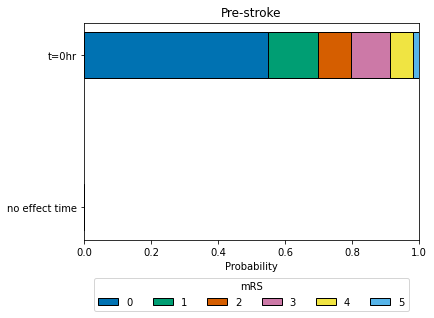

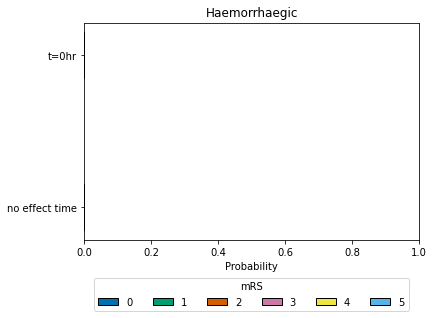

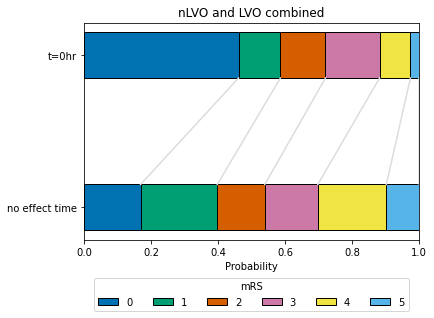

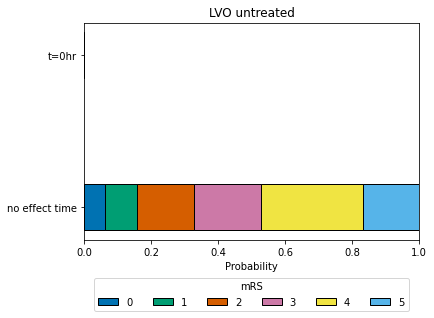

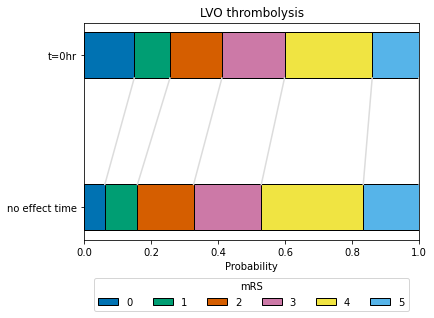

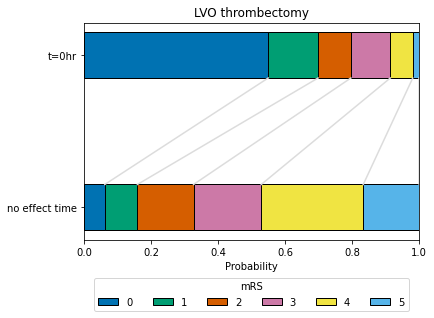

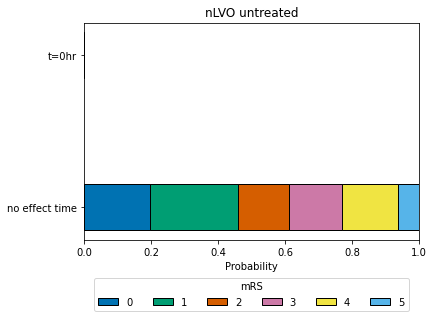

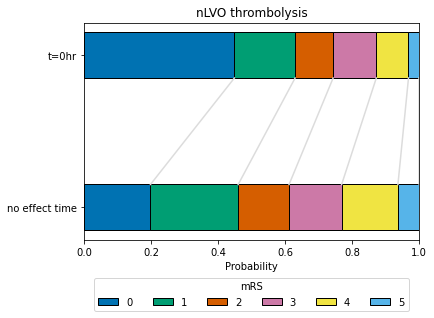

In [126]:
for data_list in big_data_list:
    
    dict_t0  = data_list[0]
    dict_tne = data_list[1]
    label    = data_list[2]
    
    draw_horizontal_bar(dict_tne['dist'], 'no effect time')
    
    # Add legend now to prevent doubling all the labels:
    plt.legend(loc='center',ncol=6, title='mRS',
               bbox_to_anchor=[0.5,0.0,0.0,-0.5])   # Legend below axis.
    
    draw_horizontal_bar(dict_t0['dist'], 't=0hr')
    
    # Draw connecting lines between the two mRS groups:
    if np.sum(dict_t0['dist'])>0 and np.sum(dict_tne['dist'])>0:
        draw_connections(dict_t0['dist'], dict_tne['dist'])

       
    plt.xlabel('Probability')
    plt.title(label)
    plt.xlim(0,1)
    plt.show()

### Histograms (bar charts)

We'll write another function to draw the probability distributions as histograms:

In [119]:
def plot_two_bars(mrs_prob_dist_t0_treatment=[],
                  mrs_prob_dist_no_treatment=[], title=''):
    """
    Draw two histograms with shared scales. One for time zero, the 
    other for the no-effect time. 
    
    mrs_prob_dist_t0/no_treatment - list or np.array. Probability 
                                    distribution at given time. 
    title                         - string. title for the plot.
    """
    fig, axs = plt.subplots(1,2)
        
    # Plot the data:
    axs[0].bar(range(6),mrs_prob_dist_t0_treatment)
    axs[1].bar(range(6),mrs_prob_dist_no_treatment)
    
    # Labels and axis setup:
    labels = ['Time 0hr', 'Time of no effect']
    # Share y axis:
    for i,ax in enumerate(axs):
        ax.set_xlabel('mRS')
        ax.set_ylabel('Probability')
        ax.set_xlim(-0.3,6.9)
        ax.set_ylim(0.0,0.6)
        ax.tick_params(right=True, left=True)
        ax.annotate(labels[i], xy=(0.0, ax.get_ylim()[1]*0.95),
                    va='center', ha='left')

    # Move RHS plot's y-axis labels to its right:
    axs[1].yaxis.tick_right()
    axs[1].yaxis.set_label_position('right')
    # Remind RHS axis to put tick marks on left:
    axs[1].tick_params(left=True)
    
    fig.suptitle(title)
    plt.show()

Now plot each row of the big data list:

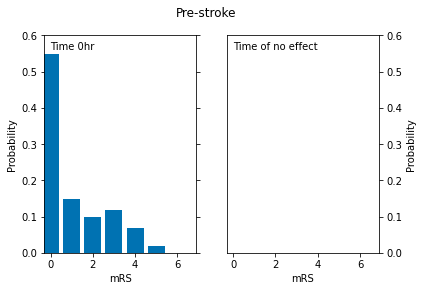

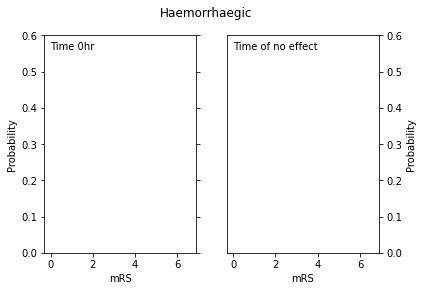

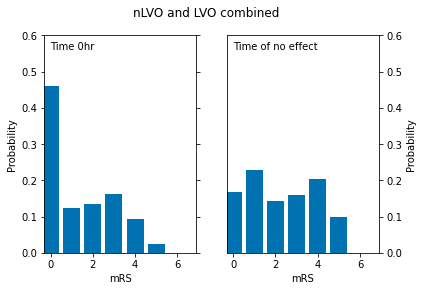

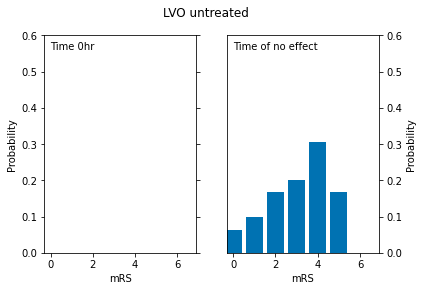

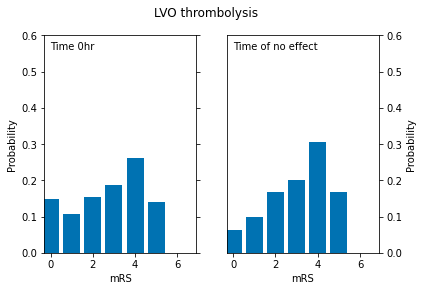

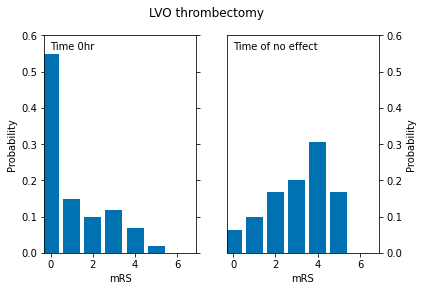

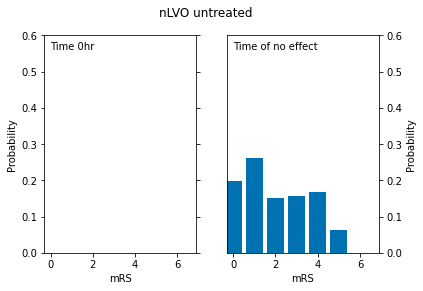

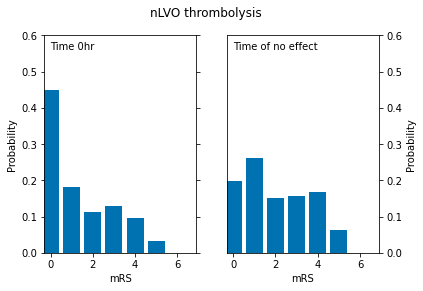

In [120]:
for data_list in big_data_list:
    
    dict_t0  = data_list[0]
    dict_tne = data_list[1]
    label    = data_list[2]
    
    plot_two_bars(dict_t0['dist'], dict_tne['dist'], label)

---

# Distributions that require explanation

## nLVO and LVO combined - t=0

Sources: 
+ Lees et al. 2010 (no treatment distribution),
+ SAMueL-1 dataset (pre-stroke distribution),
+ Emberson et al. 2014 (odds ratio for mRS<=1 at t=1hr).

Use the "no effect" distribution with the t=1hr value from Emberson+2014 to extrapolate back and find a t=0hr point, then scale the pre-stroke bins back to match.

Steps:
1. 
1. 
 

Use the following imported datasets and known values: 

In [15]:
mrs_prob_bins_no_treatment_nlvo_lvo = dict_no_treatment_nlvo_lvo['bins']
mrs_prob_bins_t0_treatment_pre = dict_pre_stroke['bins']

In [16]:
OR   = 1.9
t_ne = 6.3 # hours
p    = mrs_prob_bins_no_treatment_nlvo_lvo[1]

Use the odds ratio at t=1hr and probability at t=(time of No Effect) to find odds ratio `OR` and probability `p` at t=0:

In [17]:
from outcome_utilities.extrapolate_odds_ratio import extrapolate_odds_ratio

OR, p, a, b = extrapolate_odds_ratio(
    t_1=60,      OR_1=1.9,             # t=1hr data
    t_2=60*t_ne, OR_2=1,   p_2=p,      # t=t_ne data
    t_e=0 )                            # Extrapolate to time 0.

Use the new probability `p` to scale the pre-stroke bins:

In [18]:
from outcome_utilities.scale_dist import scale_dist

mrs_prob_dist_t0_treatment_nlvo_lvo, mrs_prob_bins_no_treatment_nlvo_lvo = (
    scale_dist(mrs_prob_bins_t0_treatment_pre, p, mRS_ref=1))

In [19]:
mrs_prob_dist_t0_treatment_nlvo_lvo

array([0.46101   , 0.12494963, 0.1346828 , 0.16163172, 0.09212051,
       0.02560533])

Compare with the imported data:

In [20]:
dict_t0_treatment_nlvo_lvo['dist']

array([0.46101   , 0.12494963, 0.1346828 , 0.16163172, 0.09212051,
       0.02560533])

---

## LVO - thrombolysis only - t=0

Weighted distribution of full effect `mrs_prob_dist_t0_treatment_pre` and no effect `mrs_prob_dist_no_treatment_LVO`, 0.18:0.82. (as in Holodinsky paper).

Steps:
1. 
1. 
 

Use the following imported datasets and known values: 

In [21]:
mrs_prob_dist_t0_treatment_pre = dict_pre_stroke['dist']
mrs_prob_dist_no_treatment_lvo = dict_no_treatment_lvo['dist']

In [22]:
from outcome_utilities.mRS_datasets import (
    weight_pre_stroke_lvo_oly, weight_no_treatment_lvo_oly)

print('Weighting for pre-stroke data:',    weight_pre_stroke_lvo_oly)
print('Weighting for untreated LVO data:', weight_no_treatment_lvo_oly)

Weighting for pre-stroke data: 0.18
Weighting for untreated LVO data: 0.82


Apply the weights:

In [23]:
mrs_prob_dist_t0_treatment_lvo_oly = (
    (weight_pre_stroke_lvo_oly   * mrs_prob_dist_t0_treatment_pre) + 
    (weight_no_treatment_lvo_oly * mrs_prob_dist_no_treatment_lvo) )

In [24]:
mrs_prob_dist_t0_treatment_lvo_oly

array([0.14947714, 0.10668805, 0.15516151, 0.1870043 , 0.26181487,
       0.13985412])

Compare this with the imported distribution:

In [25]:
dict_t0_treatment_lvo_oly['dist']

array([0.1494771437409869, 0.10668804796961767, 0.15516150566564757,
       0.18700430472724422, 0.26181487349849736, 0.13985412439800624],
      dtype=object)

### Plot the weighting

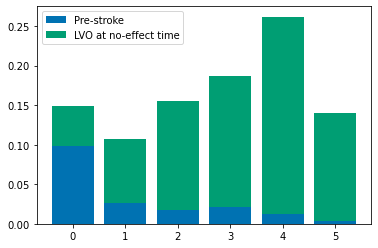

In [26]:
weighted_pre = weight_pre_stroke_lvo_oly   * mrs_prob_dist_t0_treatment_pre
weighted_lvo = weight_no_treatment_lvo_oly * mrs_prob_dist_no_treatment_lvo

bars = plt.bar(range(6), weighted_pre, label='Pre-stroke' )

# Draw the second set of bars on top of the first using 'tops' list:
tops = bars.datavalues
plt.bar(range(6), weighted_lvo, bottom=tops, label='LVO at no-effect time' )

plt.legend()
plt.show()

---

## nLVO - untreated - time of no effect

Estimate from weighted subtraction of Goyal+2016 data from the Lees+2010 data.

Steps:
1. 
1. 
 

In [55]:
mrs_prob_dist_no_treatment_Lees = dict_no_treatment_nlvo_lvo['dist']
mrs_prob_dist_no_treatment_LVO  = dict_no_treatment_lvo['dist']

In [56]:
from outcome_utilities.mRS_datasets import (
    weight_no_treatment_nlvo_lvo, weight_no_treatment_lvo)

print('Weights:')
print('untreated nLVO and LVO data:', weight_no_treatment_nlvo_lvo)
print('untreated LVO data:         ', weight_no_treatment_lvo)

Weights:
untreated nLVO and LVO data: 1.0
untreated LVO data:          -0.4


In [57]:
mrs_prob_dist_no_treatment_nLVO = (
    (weight_no_treatment_nlvo_lvo * mrs_prob_dist_no_treatment_Lees) + 
    (weight_no_treatment_lvo      * mrs_prob_dist_no_treatment_LVO) )

Currently the bins are unlikely to sum to 1 as required, so they must be normalised:

In [58]:
mrs_prob_dist_no_treatment_nLVO = (mrs_prob_dist_no_treatment_nLVO / 
                                   np.sum(mrs_prob_dist_no_treatment_nLVO))

In [59]:
mrs_prob_dist_no_treatment_nLVO

array([0.23958184, 0.31696477, 0.12476506, 0.12894086, 0.13806616,
       0.05168132])

Check whether mRS<=1 value is a match for the 46% value from Holodinsky+2018.

In [60]:
mrs_prob_bins_no_treatment_nLVO = np.cumsum(mrs_prob_dist_no_treatment_nLVO)

In [61]:
mrs_prob_bins_no_treatment_nLVO[1]

0.5565466025542539

Scale the bins to match the value from Holodinsky+2018, $P(mRS\leq1, t=T_0)=0.46$.

In [62]:
mRS_ref_nLVO = 1
p_ref_nLVO   = 0.46

In [63]:
from outcome_utilities.scale_dist import scale_dist

mrs_prob_dist_no_treatment_nLVO, mrs_prob_bins_no_treatment_nLVO = (
    scale_dist(mrs_prob_bins_no_treatment_nLVO, p_ref_nLVO, mRS_ref=mRS_ref_nLVO))

In [64]:
mrs_prob_dist_no_treatment_nLVO

array([0.19802051, 0.26197949, 0.15192832, 0.15701327, 0.16812528,
       0.06293313])

In [65]:
mrs_prob_bins_no_treatment_nLVO

array([0.19802051, 0.46      , 0.61192832, 0.76894159, 0.93706687,
       1.        ])

Compare with the imported data:

In [66]:
dict_no_treatment_nlvo['dist']

array([0.19802051, 0.26197949, 0.15192832, 0.15701327, 0.16812528,
       0.06293313])

---

## nLVO - thrombolysis

## t=0 distribution

Weighted distribution of the pre-stroke and "no effect" distributions.

Steps:
1. 
1. 
 

Find the weighting that results in $P(mRS<=1, t=0)=0.63$ (from Holodinsky+2018).

In [89]:
from outcome_utilities.mRS_datasets import weight_pre_stroke_nlvo_oly, weight_no_treatment_nlvo_oly

print(weight_pre_stroke_nlvo_oly, weight_no_treatment_nlvo_oly)

0.7127280650232234 0.2872719349767766


In [83]:
mrs_prob_bins_no_treatment_nLVO_oly = dict_no_treatment_nlvo_oly['bins']
mrs_prob_bins_t0_treatment_pre = dict_pre_stroke['bins']

mrs_prob_dist_no_treatment_nLVO_oly = dict_no_treatment_nlvo_oly['dist']
mrs_prob_dist_t0_treatment_pre = dict_pre_stroke['dist']

In [90]:
# Define the weights 'w':
weight_pre_stroke_nlvo_oly = (
    (0.63 - mrs_prob_bins_no_treatment_nLVO_oly[1]) / 
    (mrs_prob_bins_t0_treatment_pre[1] - mrs_prob_bins_no_treatment_nLVO_oly[1])
    )
weight_no_treatment_nlvo_oly = 1.0 - weight_pre_stroke_nlvo_oly

print('Weights: ', weight_pre_stroke_nlvo_oly, weight_no_treatment_nlvo_oly)


Weights:  0.7127280650232234 0.2872719349767766


In [91]:
mrs_prob_dist_t0_treatment_nLVO_oly = (
    (weight_pre_stroke_nlvo_oly   * mrs_prob_dist_t0_treatment_pre) + 
    (weight_no_treatment_nlvo_oly * mrs_prob_dist_no_treatment_nLVO_oly) )

# mrs_prob_dist_t0_treatment_nLVO_oly = np.diff(np.append([0.0],mrs_prob_bins_t0_treatment_nLVO_oly))
mrs_prob_bins_t0_treatment_nLVO_oly = np.cumsum(mrs_prob_dist_t0_treatment_nLVO_oly)


In [92]:
mrs_prob_dist_t0_treatment_nLVO_oly

array([0.44857841, 0.18142159, 0.11354063, 0.12898698, 0.09610515,
       0.03136724])

In [93]:
mrs_prob_bins_t0_treatment_nLVO_oly

array([0.44857841, 0.63      , 0.74354063, 0.87252761, 0.96863276,
       1.        ])

Compare with the imported data:

In [94]:
dict_t0_treatment_nlvo_oly['dist']

array([0.44857840504423757, 0.1814215949557623, 0.11354062928179183,
       0.12898698302604514, 0.09610514903527713, 0.031367238656885975],
      dtype=object)

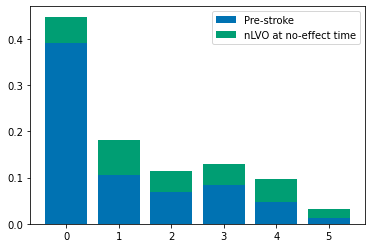

In [95]:
weighted_pre  = weight_pre_stroke_nlvo_oly   * mrs_prob_dist_t0_treatment_pre
weighted_nlvo_oly = weight_no_treatment_nlvo_oly * mrs_prob_dist_no_treatment_nLVO_oly

bars = plt.bar(range(6), weighted_pre, label='Pre-stroke' )

# Draw the second set of bars on top of the first using 'tops' list:
tops = bars.datavalues
plt.bar(range(6), weighted_nlvo_oly, bottom=tops, label='nLVO at no-effect time' )

plt.legend()
plt.show()

In [82]:
print(weight_pre_stroke_nlvo_oly,np.sum(weighted_pre))

0.09786465119634728 0.0978646511963473


---

### References:

- Holodinsky+2018
- Goyal+2016
- Emberson+2014
- Lees+2010
